In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from collections import defaultdict

In [2]:
df11 = pd.read_csv("../dataset/sample_data2/11/11_Desktop_Keyboard.csv")
df16 = pd.read_csv("../dataset/sample_data2/16/16_Desktop_Keyboard.csv")

In [3]:
def preprocess(df):
    df["key"] = df["key"].astype(str)
    df["time"] = pd.to_datetime(df["time"])

In [4]:
def create_basic_features(df):
    df["time_diff"] = (df["time"] - df["time"].shift(1)).transform(lambda x: x.total_seconds())
    df.loc[0, "time_diff"] = 0
    df["time_since_beginning"] = np.cumsum(df["time_diff"])

In [5]:
preprocess(df11)
preprocess(df16)

In [6]:
create_basic_features(df11)
create_basic_features(df16)

## Time diff between two consecutive events

In [7]:
def plot_line_plot_with_rolling(df, rolling_window_size=30):
    plt.figure(facecolor="white", figsize=(30,7))
    sns.lineplot(data=df, x="time_since_beginning", y="time_diff", linewidth=0.5, label="default")
    sns.lineplot(data=df, x="time_since_beginning", y=df["time_diff"].rolling(rolling_window_size).mean(), linewidth=2.5, label=f"rolling-{rolling_window_size}")
    plt.ylim((0, 3))
    plt.xlim((0,2500))
    plt.show()

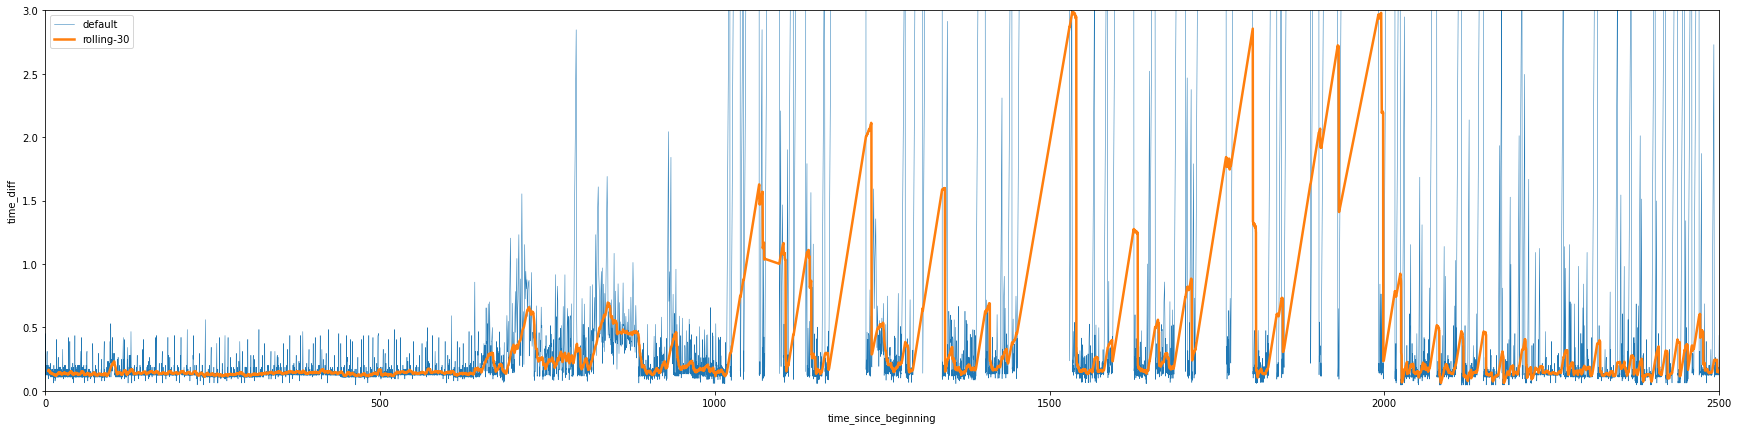

In [8]:
plot_line_plot_with_rolling(df11, 30)

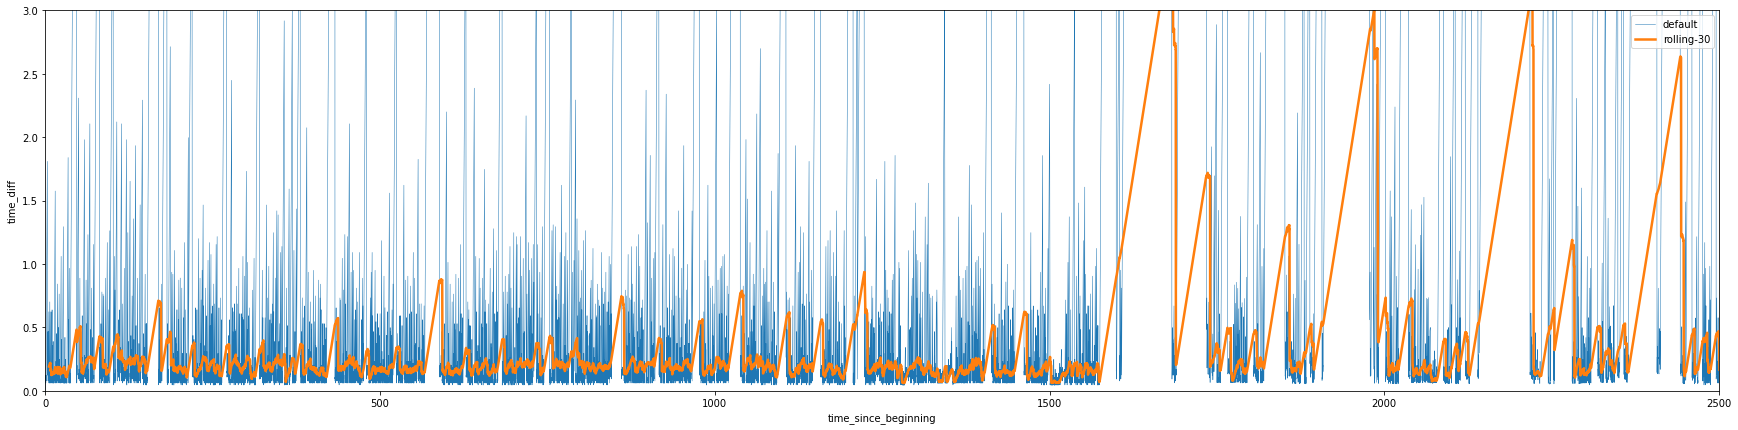

In [9]:
plot_line_plot_with_rolling(df16, 30)

## Keys hold time

In [10]:
def get_key_holdtime(df):
    keys_hold_time = defaultdict(list)
    keys_time_diff = defaultdict(lambda: (0,1))
    impossible_cases = []
    for row in df.itertuples():
        if keys_time_diff[row.key][1]==0 and row.direction==1:
            keys_hold_time[row.key].append([row.time_since_beginning, row.time_since_beginning - keys_time_diff[row.key][0]])

        elif keys_time_diff[row.key][1]==row.direction:
            impossible_cases.append((row.Index, row.key, row.direction))
        
        keys_time_diff[row.key] = (row.time_since_beginning, row.direction)
    
    return keys_hold_time, impossible_cases


In [11]:
def plot_key_holdtime(keys_hold_time, key):
    fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10,5), facecolor="white", gridspec_kw=dict(width_ratios=[3,0.5]))
    sns.lineplot(x=np.array(keys_hold_time[key])[:,0], y=np.array(keys_hold_time[key])[:,1], linewidth=0.5, ax=ax[0])
    sns.lineplot(x=np.array(keys_hold_time[key])[:,0], y=pd.Series([x[1] for x in keys_hold_time[key]]).rolling(30).mean(), linewidth=2.5, ax=ax[0])
    sns.histplot(y=np.array(keys_hold_time[key])[:,1], stat="probability", ax=ax[1], legend=False)
    ax[0].set_title(f"Key: {key}")
    ax[0].set_ylabel("Holdtime")
    ax[0].set_xlabel("Time since beginning")
    ax[0].set_xlim((0,3000))
    fig.tight_layout()

In [12]:
keys_hold_time_11,_ = get_key_holdtime(df11)
keys_hold_time_16,_ = get_key_holdtime(df16)

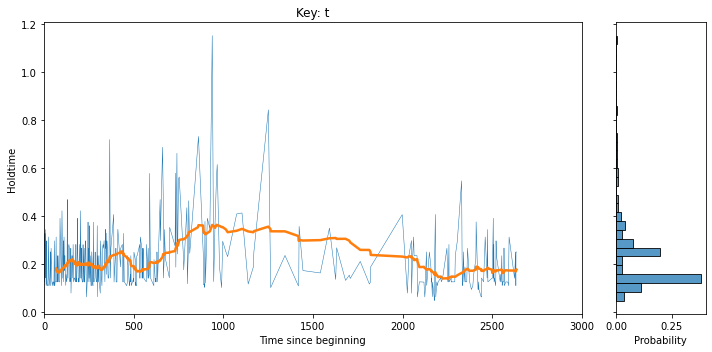

In [13]:
plot_key_holdtime(keys_hold_time_11, 't')

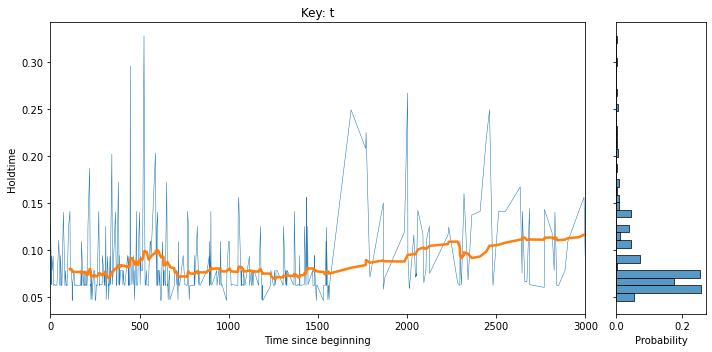

In [14]:
plot_key_holdtime(keys_hold_time_16, 't')

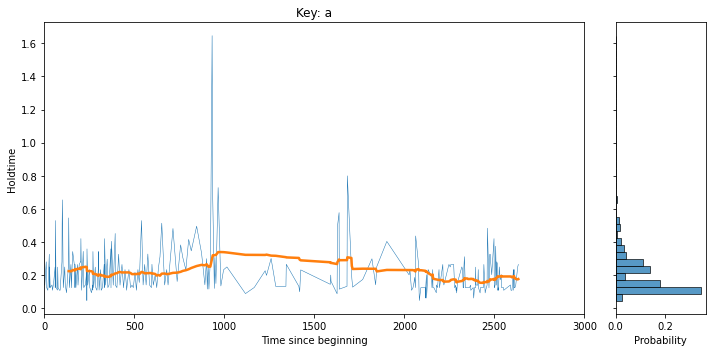

In [15]:
plot_key_holdtime(keys_hold_time_11, 'a')

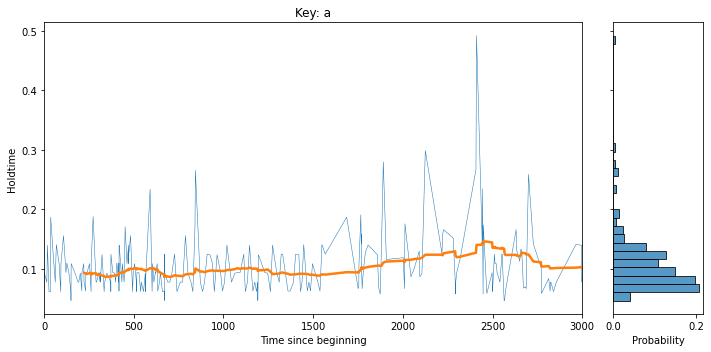

In [16]:
plot_key_holdtime(keys_hold_time_16, 'a')

## Keypress frequency

In [17]:
def plot_keypress_frequency(df, key):
    # hold is counted as one press
    tmpdf = df[(df["key"]==key) & (df["direction"]==0)]

    fig = plt.figure(facecolor="white")
    ax = plt.subplot(1,1,1)
    sns.histplot(x=tmpdf["time_since_beginning"], binwidth=100, ax=ax)
    ax.set_xlim((0,3000))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
    plt.show()

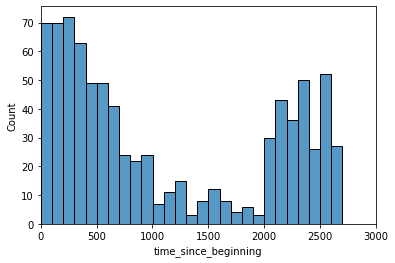

In [18]:
plot_keypress_frequency(df11, "SPACE")

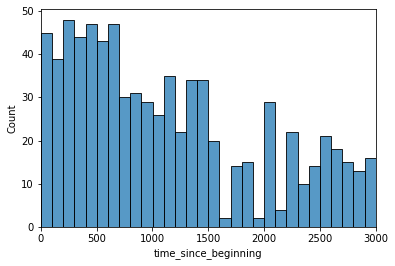

In [19]:
plot_keypress_frequency(df16, "SPACE")

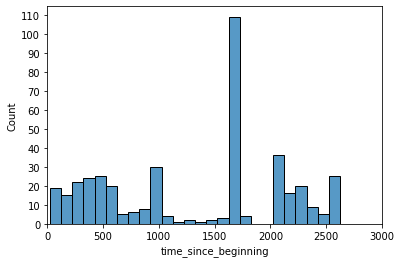

In [20]:
plot_keypress_frequency(df11, "BACKSPACE")

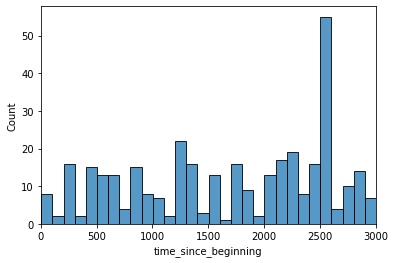

In [21]:
plot_keypress_frequency(df16, "BACKSPACE")

In [22]:
df11

,EID,key,direction,time,time_diff,time_since_beginning
0,0,t,0,2017-04-29 16:40:24.340,0.000,0.000
1,1,t,1,2017-04-29 16:40:24.465,0.125,0.125
2,2,h,0,2017-04-29 16:40:24.917,0.452,0.577
3,3,i,0,2017-04-29 16:40:25.057,0.140,0.717
4,4,h,1,2017-04-29 16:40:25.260,0.203,0.920
...,...,...,...,...,...,...
11642,11642,LCTRL,0,2017-04-29 17:24:30.755,0.514,2646.415
11643,11643,LCTRL,0,2017-04-29 17:24:30.865,0.110,2646.525
11644,11644,s,0,2017-04-29 17:24:30.989,0.124,2646.649
11645,11645,s,1,2017-04-29 17:24:31.099,0.110,2646.759
